In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [10]:
california = fetch_california_housing()
X, y = california.data, california.target.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:

class LinearRegression:
    def __init__(self, n_features, use_momentum=False, beta=0.9):
        self.W = np.random.randn(n_features, 1) * 0.01
        self.b = np.zeros((1, 1))
        self.use_momentum = use_momentum
        self.beta = beta
        self.v_W = np.zeros_like(self.W)  
        self.v_b = np.zeros_like(self.b)  

    def forward(self, X):
        return np.dot(X, self.W) + self.b

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    def update(self, dW, db, lr):
        if self.use_momentum:
            
            self.v_W = self.beta * self.v_W + (1 - self.beta) * dW
            self.v_b = self.beta * self.v_b + (1 - self.beta) * db
            self.W -= lr * self.v_W
            self.b -= lr * self.v_b
        else:
            
            self.W -= lr * dW
            self.b -= lr * db


In [13]:

def train_model(use_momentum=False, beta=0.9, epochs=100, lr=0.01):
    model = LinearRegression(X_train.shape[1], use_momentum, beta)
    losses = []
    
    for epoch in range(epochs):
        y_pred = model.forward(X_train)
        
        loss = model.compute_loss(y_train, y_pred)
        losses.append(loss)
        
        error = y_pred - y_train
        dW = np.dot(X_train.T, error) / X_train.shape[0]
        db = np.sum(error, axis=0, keepdims=True) / X_train.shape[0]
        
        model.update(dW, db, lr)
        
    return losses


In [14]:
gd_losses = train_model(use_momentum=False)
momentum_losses = train_model(use_momentum=True, beta=0.9)


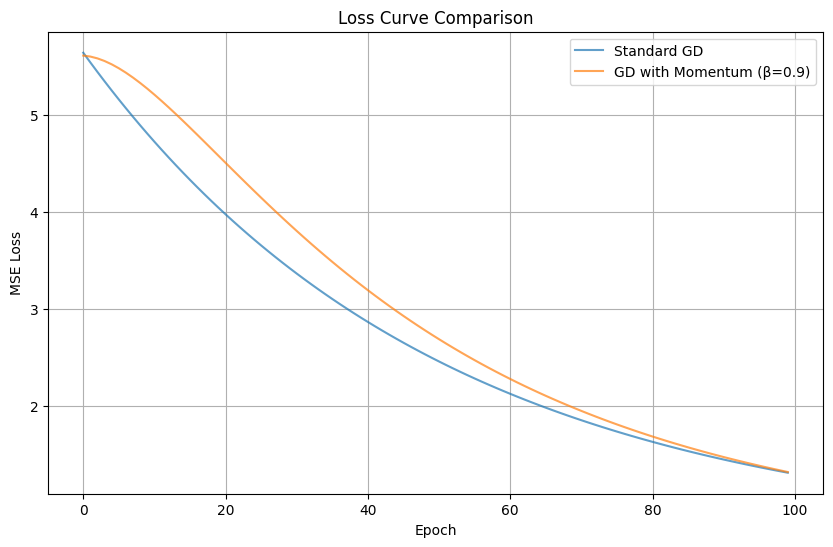

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(gd_losses, label='Standard GD', alpha=0.7)
plt.plot(momentum_losses, label='GD with Momentum (β=0.9)', alpha=0.7)
plt.title('Loss Curve Comparison')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()
